<a href="https://colab.research.google.com/github/lrivero54/Estadistista-Computarizada/blob/main/Copia_Encuestas_2024_Seguridad_del_Caribe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# @title ** Analisis de encuestas de una empresa de seguridad del Caribe*

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Contexto del Dataset
Este conjunto de datos contiene información sobre la satisfacción de los clientes actuales de una empresa de seguridad del Caribe durante el año 2024; incluyendo los datos demograficos de las personas que la diligencian, su apreciación del servicio suministrado y su nivel de satisfacción.

### Columnas

- **Ciudad**: La ubicación o ciudad de la persona que diligencia la encuesta
- **Sector**: Clasificación por area de su actividad económica.
- **Género**: La identidad de género de las personas encuestadas.
- **Tipo de servicio**: Los servicios que ofrece la empresa Seguridad física (SF), Seguridad electrónica (SE).

Preguntas apreciativas:
- **Actitud del personal**: Su comportamiento en el entorno laboral.
- **C- H - D**: Competencia, habilidades y desempeño del personal asignado.
- **Presentación personal**: Su apariencia externa en la prestación del servicio.
- **Atención y solución**: Rapidez a la solución de inconvenientes.
- **Elementos de seguridad**: Cumplen con los requerimientos operativos.
- **Promesa de valor**: Se cumple o no la promesa contractual adquirida desde el inicio del servicio.
- **Recomiendas**: Recomienda o no la empresa.


In [24]:
df = pd.read_csv('/content/BASE-DE-DATOS-ENCUESTAS (1).csv')
df

,Ciudad,SECTOR,Genero,Tipo de servicio,Actitud del personal,C- H-D,Presentación Personal,Atención y solución,Elementos de seguridad ( y medios tecnológicos,Promesa de valor,Nos recomiendas
0,BARRANQUILLA,SALUD,F,SF-SE,5,5,5,5,5,Si,10
1,SANTA MARTA,SALUD,F,SF-SE,5,5,5,5,5,Si,9
2,BARRANQUILLA,INDUSTRIAL,M,SF,5,5,5,5,5,Si,10
3,CARTAGENA,EDUCATIVO,F,SF,4,5,4,4,3,Si,6
4,BARRANQUILLA,SALUD,F,SF-SE,5,5,5,5,4,Si,10
5,CUCUTA,COMERCIAL,F,SE,4,4,4,4,4,Si,7
6,BARRANQUILLA,COMERCIAL,M,SF-SE,5,5,5,4,5,Si,8
7,SANTA MARTA,RETAIL,M,SE,5,5,5,5,5,Si,10
8,BARRANQUILLA,SERVICIOS,M,SF-SE,5,5,5,5,5,Si,10
9,BARRANQUILLA,INDUSTRIAL,M,SF-SE,4,4,4,4,4,Si,8


In [25]:
df[['Actitud del personal','C- H-D','Atención y solución','Nos recomiendas']].describe()

,Actitud del personal,C- H-D,Atención y solución,Nos recomiendas
count,46.000000,46.000000,46.000000,46.000000
mean,4.673913,4.673913,4.652174,9.239130
std,0.473960,0.518731,0.640048,1.078781
min,4.000000,3.000000,3.000000,6.000000
25%,4.000000,4.000000,4.250000,9.000000
50%,5.000000,5.000000,5.000000,10.000000
75%,5.000000,5.000000,5.000000,10.000000
max,5.000000,5.000000,5.000000,10.000000


- **Actitud del personal**: La media está en **4.67**, con un rango entre **4 y 5** en las calificaciones obtenidas por la muestra; mostrando satisfaccion en el cliente en la atención del personal asignado a su dispositivo y/o servicio tecnico recibido.
  
- **C- H-D**: Tiene una media de **4.67** y un rango entre **3 y 5**. Aunque la mayoría muestra conformidad en el desempeño, habilidades y competencia del personal, ya que tanto el 25%, 50% como el 75% de los datos se encuentran en este nivel; alguno no se encuentra tan conforme al brindar una calificación de **3** que fue la minima recibida.

- **Atención y solución**: La atencion y resolución de inconvenienentes a traves de **PQRS** tiene una calificación buena, al tener una media de **4.65**, con un rango entre **3 y 5**
  
- **Nos recomiendas**: La media es de **9.23** y el rango varía entre **6 y 10**, lo que muestra diversidad en las opiniones de los clientes, lo que demuestra que los datos en estan un poco dispersos como se observa en la desviación estandar obtenida.

In [26]:
df[['Ciudad','SECTOR','Genero','Tipo de servicio','Promesa de valor']].describe()

,Ciudad,SECTOR,Genero,Tipo de servicio,Promesa de valor
count,46,46,46,46,46
unique,13,9,2,3,1
top,BARRANQUILLA,RETAIL,F,SF,Si
freq,16,10,23,26,46


- **Ciudad**: Existen **13 ciudades o ubicaciones** de las cuales **Barranquilla** es la que mas encuestas a realizado, como se observa en la frecuencia, que para este caso es de **16**.

- **Sector**: Hay **9 sectores** representadas en la muestra, de las cuales el **Retail** es la más común con **10** encuestas realizadas.

- **Género**: Se identifican **2 géneros**, con **Femenino** como el género predominante, representando a **23 encuestados**.

- **Tipo de servicio**: También tiene **3 categorías** (SF/SE/ SF-SE), y **SF** es la más frecuente con **26 clientes con seguridad física**.

- **Promesa de valor**: También tiene **2 categorías** (Sí/No), sin embargo solo se observa **1** en la descripción ya que en la muestra ha sido la unica respuesta.

In [27]:
descriptive_stats = df.groupby('Nos recomiendas').describe()
vertical_stats = descriptive_stats.stack()
vertical_stats

<ipython-input-27-256f01b1c430>:2: FutureWarning:

The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.



Actitud del personal     C- H-D  Presentación Personal  \
Nos recomiendas                                                                 
6               count              2.000000   2.000000               2.000000   
                mean               4.000000   4.000000               4.000000   
                std                0.000000   1.414214               0.000000   
                min                4.000000   3.000000               4.000000   
                25%                4.000000   3.500000               4.000000   
                50%                4.000000   4.000000               4.000000   
                75%                4.000000   4.500000               4.000000   
                max                4.000000   5.000000               4.000000   
7               count              1.000000   1.000000               1.000000   
                mean               4.000000   4.000000               4.000000   
                min                4.000000   4.000000               4.000000   
                25%                4.000000   4.000000               4.000000   
                50%                4.000000   4.000000               4.000000   
                75%                4.000000   4.000000               4.000000   
                max                4.000000   4.000000               4.000000   
8               count              7.000000   7.000000               7.000000   
                mean               4.285714   4.285714               4.285714   
                std                0.487950   0.487950               0.487950   
                min                4.000000   4.000000               4.000000   
                25%                4.000000   4.000000               4.000000   
                50%                4.000000   4.000000               4.000000   
                75%                4.500000   4.500000               4.500000   
                max                5.000000   5.000000               5.000000   
9               count             10.000000  10.000000              10.000000   
                mean               4.600000   4.500000               4.600000   
                std                0.516398   0.527046               0.699206   
                min                4.000000   4.000000               3.000000   
                25%                4.000000   4.000000               4.250000   
                50%                5.000000   4.500000               5.000000   
                75%                5.000000   5.000000               5.000000   
                max                5.000000   5.000000               5.000000   
10              count             26.000000  26.000000              26.000000   
                mean               4.884615   4.923077               4.846154   
                std                0.325813   0.271746               0.367946   
                min                4.000000   4.000000               4.000000   
                25%                5.000000   5.000000               5.000000   
                50%                5.000000   5.000000               5.000000   
                75%                5.000000   5.000000               5.000000   
                max                5.000000   5.000000               5.000000   

                       Atención y solución  \
Nos recomiendas                              
6               count             2.000000   
                mean              4.500000   
                std               0.707107   
                min               4.000000   
                25%               4.250000   
                50%               4.500000   
                75%               4.750000   
                max               5.000000   
7               count             1.000000   
                mean              4.000000   
                min               4.000000   
                25%               4.000000   
                50%               4.000000   
           

Al comparar las estadísticas entre los clientes que recomendarian el servicio de seguridad de esta empresa sin dudarlo y los que si, en que afectaria su decisión.
Se puede observar que los patrones no son muy marcados, pero se muestran algunas diferencias leves en las preguntas apreciativas: Entre las competencias, los elementos que componen el servicio y las PQRS.

- **Se puede notar que los rangos mas bajos en calificaciones son menos frecuentes en la muestra, sin embargo, es de resaltar que para estos casos, cuando hay punto de comparación su dispersión no estan lejana, pero el caso de la califiación **6** es particular porque las dos personas que la dieron tienen opiniones dispersas en algunas preguntas, dando lugar a una mayor dispersión de los datos.

En resumen, aunque no hay patrones claramente diferenciados, se observa una tendencia a recomendar la compañia por su servicio.

## Visualización

In [28]:
fig = px.histogram(df, x='Presentación Personal', color='Genero', barmode='group', title=' Calificación obtenida de Presentación Personal por Distribución de Género', labels={'Presentación Personal': 'Presentación Personal', 'Genero': 'Género'})
fig.update_layout(yaxis_title='Cantidad')
fig.show()

La gráfica muestra la calificación obtenida en presentación personal por **distribución de género**. Se puede observar que aunque es la misma cantidad de genero femenino como masculino encuestados no analizan lo mismo; para el caso de las mujeres es mas dificil de impresionar o cumplir con los estandares de presentación personal a diferencia de un hombre, por eso predominancia en la calificación 4 a comparación de los hombres; sin embargo es de aclarar que es un supuesto que se contempla en el analisis de la calificación.

Aunque para cada patron hay una excepción como es el caso de la calificación de **3** dada por un encuestado hombre.

In [29]:
fig = px.pie(df, names='Promesa de valor', title='Proporción de cumplimiento de promesa de valor o No', hole=0.3)
fig.update_traces(textinfo='percent+label')
fig.show()

**De los 46 encuestados, todos estan satisfechos con la promesa contractual realizada al inicio del servicio**.

In [30]:
fig = px.histogram(df, x='SECTOR', color='Nos recomiendas', barmode='group', title='Relación entre Sector y Nos recomiendas', labels={'SECTOR': 'SECTOR', 'Nos recomiendas': 'Nos recomiendas'})
fig.update_layout(yaxis_title='Cantidad')
fig.show()

La gráfica muestra que la empresa de seguridad tiene un buen nivel de recomendación en la mayoría de los sectores, especialmente en Servicios y Retail. Sin embargo, hay algunos sectores como Industrial, Educación y Salud donde las opiniones son más variadas de acuerdo a la muestra mostrada.

#  ** Recomendaciones*:

Profundizar en los sectores con menor satisfacción: Se recomienda investigar más a fondo las razones detrás de las calificaciones más bajas en sectores como Comercial, Educación y Salud para identificar áreas de mejora.
Enfocarse en los sectores con mayor potencial: Los sectores con alto nivel de recomendación, como Servicios y Retail, representan oportunidades para fortalecer las relaciones y buscar nuevas oportunidades de negocio.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning:

26.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<Axes: title={'center': 'Nos recomiendas vs Tipo de servicio'}, xlabel='Tipo de servicio', ylabel='Nos recomiendas'>

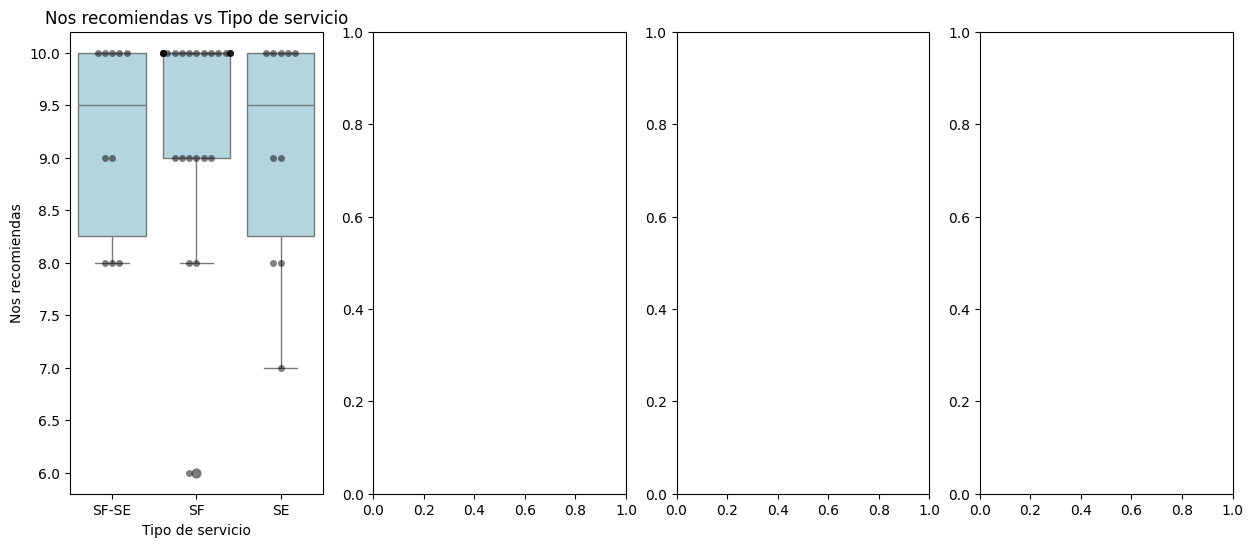

In [33]:
fig, axs = plt.subplots(1, 4, figsize=(15, 6))
axs[0].set_title('Nos recomiendas vs Tipo de servicio')
sns.boxplot(x="Tipo de servicio", y="Nos recomiendas", data=df, ax=axs[0], color='lightblue')  # Cambiar color de las cajas
sns.swarmplot(x="Tipo de servicio", y="Nos recomiendas", data=df, color='black',
              alpha = 0.5, ax=axs[0])